In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f1nalyze-datathon-ieeecsmuj/sample_submission.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv', low_memory=False)

In [3]:
# Displaying the colums in train dataset 
train.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [4]:
test=pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv', low_memory=False)

In [5]:
test.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,driverStandingsId,raceId_y,points_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,23949,997,4,1,14,13,8,8,8,4.0,...,12474,93,16.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,298739826
1,23949,997,4,1,14,13,8,8,8,4.0,...,12494,94,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299218806
2,23949,997,4,1,14,13,8,8,8,4.0,...,12514,95,21.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,299697786
3,23949,997,4,1,14,13,8,8,8,4.0,...,12534,96,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300176766
4,23949,997,4,1,14,13,8,8,8,4.0,...,12554,97,25.0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,+1 Lap,300655746


In [6]:
train.shape

(2830101, 55)

In [7]:
test.shape

(352928, 53)

# **Cleaning the data**

In [8]:
missing_columns=set(train.columns)- set(test.columns)
print(missing_columns)

{'positionText_y', 'position'}


In [9]:
train.isnull().sum()

resultId                  0
racerId                   0
driverId                  0
constructorId             0
number                    0
grid                      0
position_x                0
positionText_x            0
positionOrder             0
points                    0
laps                      0
time_x                    0
timetaken_in_millisec     0
fastestLap                0
rank                      0
fastestLapTime            0
max_speed                 0
statusId                  0
year                      0
round                     0
circuitId                 0
grand_prix                0
date                      0
time_y                    0
url_x                     0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
driverRef           

In [12]:
test.isnull().sum()

resultId                  0
racerId                   0
driverId                  0
constructorId             0
number                    0
grid                      0
position_x                0
positionText_x            0
positionOrder             0
points                    0
laps                      0
time_x                    0
timetaken_in_millisec     0
fastestLap                0
rank                      0
fastestLapTime            0
max_speed                 0
statusId                  0
year                      0
round                     0
circuitId                 0
grand_prix                0
date                      0
time_y                    0
url_x                     0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
driverRef           

In [11]:
def count_backslash_n(df):
    return(df=='\\N').sum()

In [12]:
train_backslash_count_n=count_backslash_n(train)
print("Total Occurences: ")
print(train_backslash_count_n)

Total Occurences: 
resultId                        0
racerId                         0
driverId                        0
constructorId                   0
number                        160
grid                            0
position_x                1125357
positionText_x                  0
positionOrder                   0
points                          0
laps                            0
time_x                    1871686
timetaken_in_millisec     1871741
fastestLap                2112010
rank                      2105375
fastestLapTime            2112010
max_speed                 2112010
statusId                        0
year                            0
round                           0
circuitId                       0
grand_prix                      0
date                            0
time_y                    2150026
url_x                           0
fp1_date                  2830101
fp1_time                  2830101
fp2_date                  2830101
fp2_time                  283

In [13]:
test_backslash_count_n=count_backslash_n(test)
print("Total Occurences: ")
print(test_backslash_count_n)

Total Occurences: 
resultId                       0
racerId                        0
driverId                       0
constructorId                  0
number                         0
grid                           0
position_x                 45237
positionText_x                 0
positionOrder                  0
points                         0
laps                           0
time_x                    145425
timetaken_in_millisec     145425
fastestLap                 12225
rank                           0
fastestLapTime             12225
max_speed                  12225
statusId                       0
year                           0
round                          0
circuitId                      0
grand_prix                     0
date                           0
time_y                         0
url_x                          0
fp1_date                  177237
fp1_time                  249976
fp2_date                  177237
fp2_time                  249976
fp3_date                

In [14]:
#Dropping columns with >100 \N count
columns_to_drop= train_backslash_count_n[train_backslash_count_n>100].index
print(columns_to_drop)

Index(['number', 'position_x', 'time_x', 'timetaken_in_millisec', 'fastestLap',
       'rank', 'fastestLapTime', 'max_speed', 'time_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'driver_num',
       'driver_code'],
      dtype='object')


In [15]:
train_temp=train.drop(columns=columns_to_drop)
train_temp.columns

Index(['resultId', 'racerId', 'driverId', 'constructorId', 'grid',
       'positionText_x', 'positionOrder', 'points', 'laps', 'statusId', 'year',
       'round', 'circuitId', 'grand_prix', 'date', 'url_x', 'driverRef',
       'forename', 'surname', 'dob', 'nationality', 'url_y',
       'driverStandingsId', 'raceId_y', 'points_y', 'position',
       'positionText_y', 'wins', 'constructorRef', 'company', 'nationality_y',
       'url', 'status', 'result_driver_standing'],
      dtype='object')

# **Finding Important Columns**

<Axes: >

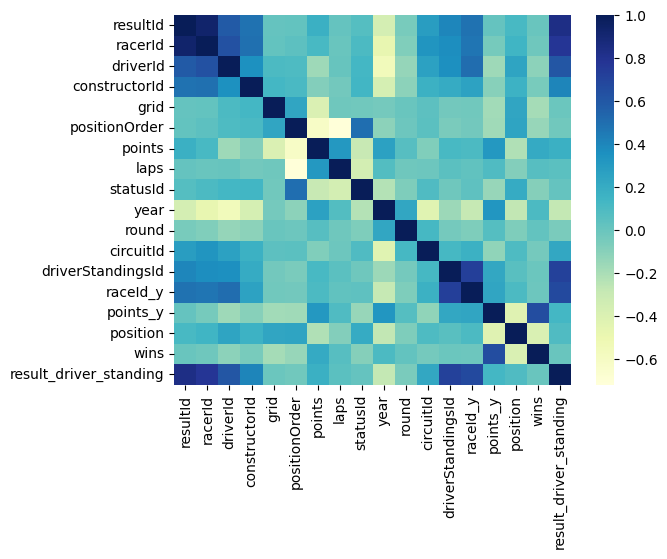

In [16]:
train_corr=train_temp.corr(numeric_only=True)
sns.heatmap(train_corr, cmap="YlGnBu")

In [17]:
columns_to_include = ["grid", "positionText_x", "points", "laps", "round", "nationality", "points_y", "position", "wins", "company", "status"]
train_cleaned=train[columns_to_include]
train_cleaned

,grid,positionText_x,points,laps,round,nationality,points_y,position,wins,company,status
0,1,1,9.0,70,1,Italian,3.33,3,0,Alfa Romeo,Finished
1,1,1,9.0,70,1,Italian,6.33,3,0,Alfa Romeo,Finished
2,1,1,9.0,70,1,Italian,6.33,4,0,Alfa Romeo,Finished
3,1,1,9.0,70,1,Italian,10.33,3,0,Alfa Romeo,Finished
4,1,1,9.0,70,1,Italian,10.33,4,0,Alfa Romeo,Finished
...,...,...,...,...,...,...,...,...,...,...,...
2830096,4,2,18.0,71,19,Australian,61.50,4,2,Red Bull,Finished
2830097,4,2,18.0,71,19,Australian,69.50,4,2,Red Bull,Finished
2830098,4,2,18.0,71,19,Australian,4.00,8,0,Red Bull,Finished
2830099,4,2,18.0,71,19,Australian,6.00,10,0,Red Bull,Finished


In [18]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830101 entries, 0 to 2830100
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   grid            int64  
 1   positionText_x  object 
 2   points          float64
 3   laps            int64  
 4   round           int64  
 5   nationality     object 
 6   points_y        float64
 7   position        int64  
 8   wins            int64  
 9   company         object 
 10  status          object 
dtypes: float64(2), int64(5), object(4)
memory usage: 237.5+ MB


In [19]:
columns_of_interest = ['positionText_x', 'nationality', 'company','status']
for column in columns_of_interest:
    unique_values=train_cleaned[column].unique()
    print(f"Unique values in Column '{column}':\n", unique_values, "\n")

Unique values in Column 'positionText_x':
 ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' 'R' 'N' 'W' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' 'D' 'F' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' 'E'] 

Unique values in Column 'nationality':
 ['Italian' 'British' 'French' 'Belgian' 'Argentine' 'Irish' 'Thai' 'Swiss'
 'Monegasque' 'American' 'German' 'Brazilian' 'Spanish' 'Australian'
 'Uruguayan' 'East German' 'Dutch' 'Swedish' 'Argentine-Italian'
 'New Zealander' 'Portuguese' 'Venezuelan' 'American-Italian'
 'South African' 'Mexican' 'Canadian' 'Rhodesian' 'Austrian'
 'Liechtensteiner' 'Danish' 'Finnish' 'Japanese' 'Chilean' 'Colombian'
 'Czech' 'Malaysian' 'Hungarian' 'Indian' 'Polish' 'Russian'] 

Unique values in Column 'company':
 ['Alfa Romeo' 'Talbot-Lago' 'ERA' 'Maserati' 'Alta' 'Ferrari' 'Simca'
 'Cooper' 'Kurtis Kraft' 'Deidt' 'Moore' 'Lesovsky' 'Nichels' 'Marchese'
 'Stevens' 'Langley' 'Ewing' 'Rae' 'Olson' 'Wetteroth' 'Snowberger'
 'Adams' 'Watson'

# **One Hot Encoding**

In [20]:
# Converting the Categorical Value into Numerical Value
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
columns_to_encode=['positionText_x', 'nationality', 'company', 'status']
for column in columns_to_include:
    train_cleaned[column]=label_encoder.fit_transform(train_cleaned[column])

print(train_cleaned.head())

/tmp/ipykernel_47/4043534935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[column]=label_encoder.fit_transform(train_cleaned[column])
/tmp/ipykernel_47/4043534935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[column]=label_encoder.fit_transform(train_cleaned[column])
/tmp/ipykernel_47/4043534935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

   grid  positionText_x  points  laps  round  nationality  points_y  position  \
0     1               0      21    70      0           22         7         2   
1     1               0      21    70      0           22        14         2   
2     1               0      21    70      0           22        14         3   
3     1               0      21    70      0           22        24         2   
4     1               0      21    70      0           22        24         3   

   wins  company  status  
0     0        4      62  
1     0        4      62  
2     0        4      62  
3     0        4      62  
4     0        4      62  


/tmp/ipykernel_47/4043534935.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned[column]=label_encoder.fit_transform(train_cleaned[column])


In [21]:
columns_to_include = ["grid", "positionText_x", "points", "laps", "round", "nationality", "points_y", "wins", "company", "status"]
test_cleaned = test[columns_to_include]
test_cleaned

,grid,positionText_x,points,laps,round,nationality,points_y,wins,company,status
0,13,8,4.0,70,9,Spanish,16.0,0,McLaren,+1 Lap
1,13,8,4.0,70,9,Spanish,21.0,0,McLaren,+1 Lap
2,13,8,4.0,70,9,Spanish,21.0,0,McLaren,+1 Lap
3,13,8,4.0,70,9,Spanish,25.0,0,McLaren,+1 Lap
4,13,8,4.0,70,9,Spanish,25.0,0,McLaren,+1 Lap
...,...,...,...,...,...,...,...,...,...,...
352923,5,R,0.0,0,12,Australian,5.0,0,McLaren,Collision damage
352924,5,R,0.0,0,12,Australian,5.0,0,McLaren,Collision damage
352925,5,R,0.0,0,12,Australian,17.0,0,McLaren,Collision damage
352926,5,R,0.0,0,12,Australian,27.0,0,McLaren,Collision damage


In [22]:
test_backslash_n_counts = count_backslash_n(test_cleaned)
print(test_backslash_n_counts)

grid              0
positionText_x    0
points            0
laps              0
round             0
nationality       0
points_y          0
wins              0
company           0
status            0
dtype: int64


In [23]:
for column in columns_to_encode:
    test_cleaned[column]=label_encoder.fit_transform(test_cleaned[column])

print(test_cleaned.head())

   grid  positionText_x  points  laps  round  nationality  points_y  wins  \
0    13              18     4.0    70      9           19      16.0     0   
1    13              18     4.0    70      9           19      21.0     0   
2    13              18     4.0    70      9           19      21.0     0   
3    13              18     4.0    70      9           19      25.0     0   
4    13              18     4.0    70      9           19      25.0     0   

   company  status  
0        7       0  
1        7       0  
2        7       0  
3        7       0  
4        7       0  


/tmp/ipykernel_47/1137182840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[column]=label_encoder.fit_transform(test_cleaned[column])
/tmp/ipykernel_47/1137182840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned[column]=label_encoder.fit_transform(test_cleaned[column])
/tmp/ipykernel_47/1137182840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

# **Working on Validation Set**

In [24]:
validation=pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv')
columns_to_include = ["grid", "positionText_x", "points", "laps", "round", "nationality", "points_y", "position", "wins", "company", "status"]
validation_cleaned = validation[columns_to_include]
validation_cleaned

for column in columns_to_encode:
    validation_cleaned[column] = label_encoder.fit_transform(validation_cleaned[column])
    
print(validation_cleaned.head())

/tmp/ipykernel_47/2311200660.py:1: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  validation=pd.read_csv('/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv')


   grid  positionText_x  points  laps  round  nationality  points_y  position  \
0     4              11    18.0    71     19            1      28.0         8   
1     4              11    18.0    71     19            1      53.0         4   
2     4              11    18.0    71     19            1      78.0         1   
3     4              11    18.0    71     19            1      93.0         1   
4     4              11    18.0    71     19            1     103.0         3   

   wins  company  status  
0     0        9      22  
1     1        9      22  
2     2        9      22  
3     2        9      22  
4     2        9      22  


/tmp/ipykernel_47/2311200660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_cleaned[column] = label_encoder.fit_transform(validation_cleaned[column])
/tmp/ipykernel_47/2311200660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_cleaned[column] = label_encoder.fit_transform(validation_cleaned[column])
/tmp/ipykernel_47/2311200660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [25]:
X_val=validation_cleaned.drop('position', axis=1)
Y_val=validation_cleaned['position']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

In [27]:
X_train=train_cleaned.drop('position', axis=1)
Y_train=train_cleaned['position']

X_test = test_cleaned

In [28]:
#Initialise the model
dt_classifier=DecisionTreeClassifier(random_state=42)

#Fit the model
dt_classifier.fit(X_train, Y_train)

#Predict on test
y_pred_dt=dt_classifier.predict(X_test)

In [29]:
# Predict on validation dataset
y_val_pred_dt = dt_classifier.predict(X_val)

In [30]:
dt_rmse = np.sqrt(mean_squared_error(Y_val, y_val_pred_dt))
print(f"Decision Tree RMSE: {dt_rmse}")

Decision Tree RMSE: 6.054760257581449


**Random Forest Classifier**

In [ ]:
# Initialise the model
rf_classifier= RandomForestClassifier(random_state=42)

#Fit the model
rf_classifier.fit(X_train, Y_train)

# Predict on test 
y_pred_rf=rf_classifier.predict(X_test)